## Solar Projects Reported in NY - Exploring Relationships, Part 2

This script continues to explore relationships between the variables of the 'solar projects reported' dataset, through visualizations. It is the second part of 'Solar Projects Reported in NY - Exploring Relationships, Part 1)

### Contents

#### 1. Importing Libraries

#### 2. Importing Data

#### 3. Exploring Relationships

##### 3.1 Scatterplot

#### 4. Sampling the dataset

##### 4.1 Pair Plot

##### 4.2 Categorical Plot

#### 5. Some responses to questions to explore 

#### 6. New questions

#### 7. Hypotheses 

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#check matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
#ensure charts are displayed without having to call them specifically
%matplotlib inline

### 2. Importing Data

In [4]:
path= r'C:\Users\ii\OneDrive\02052023Solar Programs NY'

In [5]:
path

'C:\\Users\\isobr\\OneDrive\\02052023Solar Programs NY'

In [6]:
df_sol = pd.read_pickle(os.path.join(path, '02. Prepared data', 'solar_power_clean.pkl'))

In [7]:
df_sol.shape

(75564, 21)

### 4. Relationships

In [8]:
df_sol.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'inverter_quantity',
       'pv_quantity', 'project_cost', 'incentive', 'kw_dc', 'kwh_year',
       'affordable_solar', 'community_distributed_generation',
       'location_data'],
      dtype='object')

##### 4.2 Scatterplot

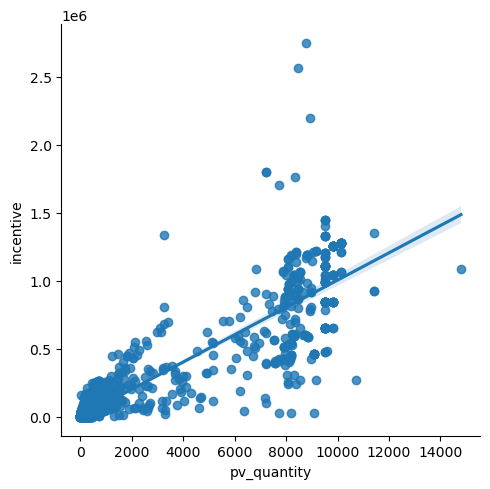

In [9]:
sns.lmplot(x = 'pv_quantity', y = 'incentive', data = df_sol)

The scatterplot shows a linear upward trend with some outliers. So the higher the incentive (which is a monetary incentive, for instance a tax discount), the larger the pv installation. 

### 5. Sampling the dataset 

Since the dataset is quite large, I've opted for making a sample for the following visual analysis

In [10]:
#sampling data
np.random.seed(4)

In [12]:
dev = np.random.rand(len(df_sol)) <= 0.7

In [13]:
dev

array([False,  True, False, ..., False, False,  True])

In [14]:
big = df_sol[dev]

In [15]:
small= df_sol[~dev]

In [16]:
#Checking if the two split dataframes match the total when added
len(big)+len(small)

75564

In [20]:
# reducing the df only to the charts that matter for the plots, so that it can be more efficient
df_2 = small[['sector','pv_quantity','project_cost','incentive', 'kw_dc','kwh_year']]

##### 4.3 Pair Plot

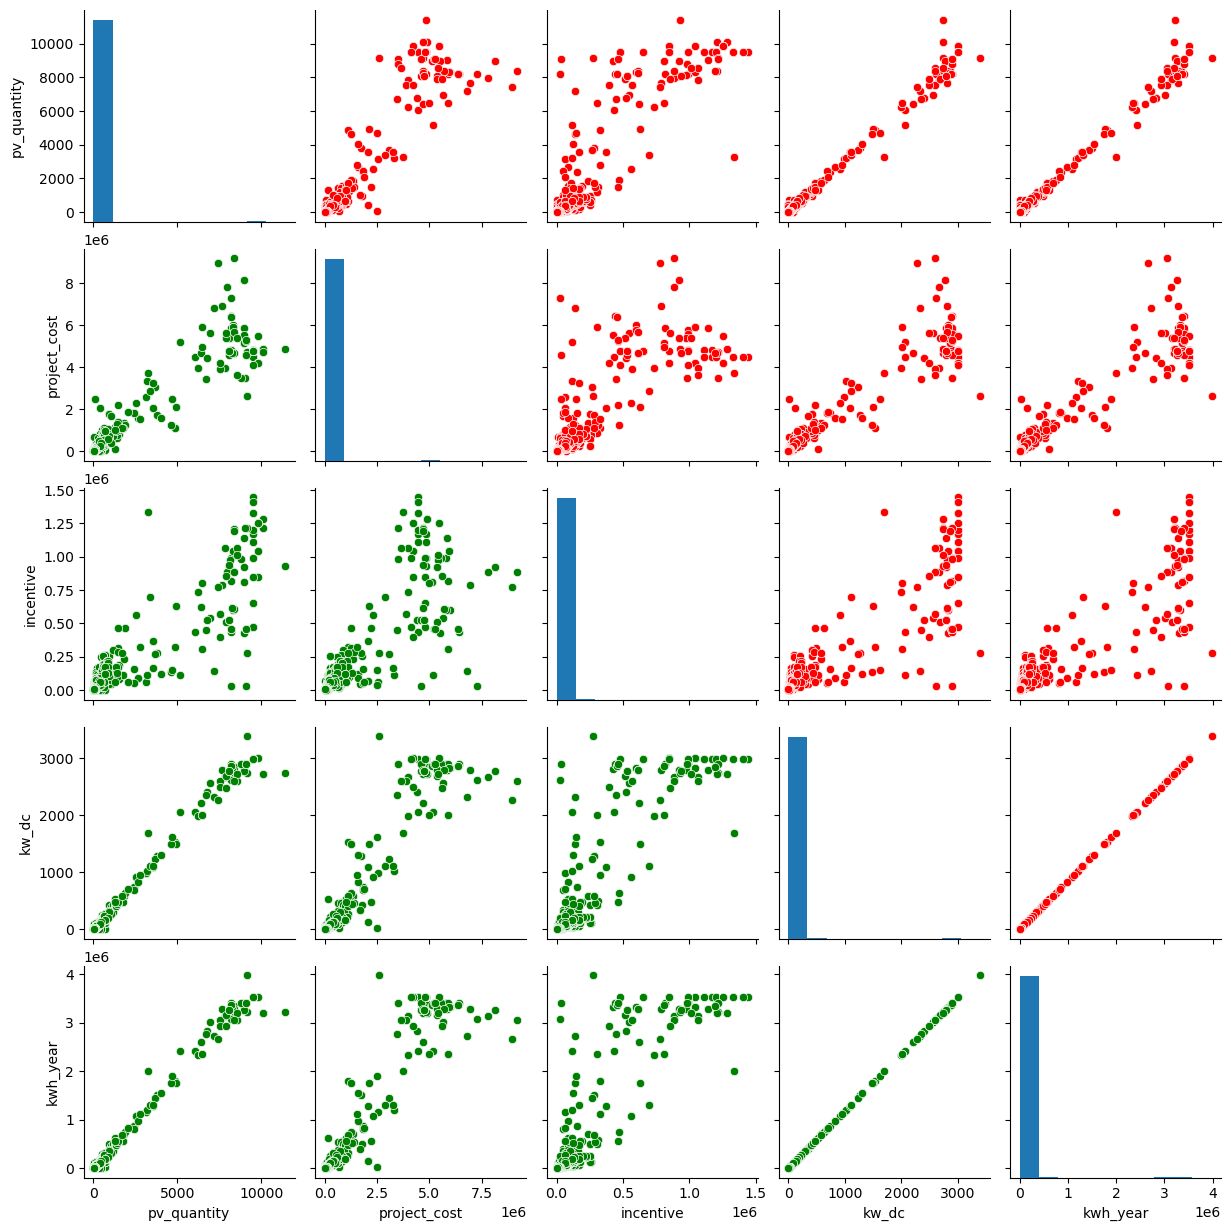

In [21]:
#create a pair plot using df_2
g = sns.pairplot(df_2)
#added some different colors
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

The pair plot shows how the variables are correlated. The histograms are barely noticebable because the data is very skewed to the left. This is also visible in the histogram below in section 4.4 of the project cost.

The variables ‘project_cost’ and ‘incentive’ are the ones I would like to work more and continue to explore in a regression analysis with pv_quantity, and kwh_year or kw_dc. Comparing these variables with other categorical variables, such as sector, and project_type may offer some interesting insights too. 

##### 4.4 Categorical Plot

<AxesSubplot:xlabel='project_cost', ylabel='Count'>

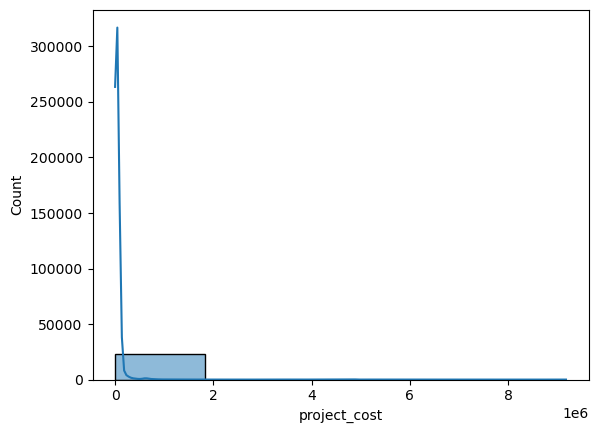

In [22]:
#For the categorical plot I will first check the distribution of project cost
sns.histplot(df_2['project_cost'], bins = 5, kde = True) # The argument "kde" add a line that encompasses the distribution

Because the data is so skewed to the left, rather than using a loc function to create a categorical plot, I will use one of the categorical varibles, namely sector, to create the plot

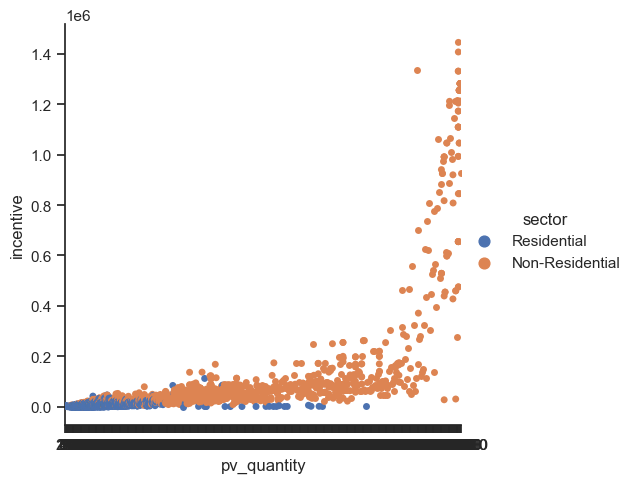

In [23]:
sns.set(style="ticks")
g = sns.catplot(x="pv_quantity", y="incentive", hue="sector", data=df_2)
# fig = g.get_figure()
g.savefig("out.png") 

The categorical plot shows a clear upward trend in pv_quantiy, which is positively correlated to incentives, particularly in the non-residential sector. The upward trend is not evident for the residential sector. Therefore, this may indicate that incentives have created a boost in PV installations for the non-residential sector - i.e., commercial and industrial projects. Exploring more these variables through a predictive model can offer key insights for future incentives and policies.

### 5. Some responses to questions to explore

Q1. What sectors have the most solar projects? - Based on the categorical plot, the non-residential sector has the most projects. 

Q2. What is the maximum expected annual electric production? - The maximum pv_quantity is 14800.000000 (kWh) and the maximum yearly production is 6.807591e+06 (KWh). 

### 6. New questions

Q7. How does the type of program vary between sectors and kwh_year?

### 7. Hypotheses 

H1.  Incentives have created a boost in PV installations for the commercial and industrial sectors

H2.  The type of program the project is associated with is a predictor of total annual production (i.e.,kwh_year) 